In [ ]:
import numpy as np
from scipy.signal import convolve2d #convolution
from imageio import imread #read image
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as T
from torch.utils.data import Dataset,DataLoader,TensorDataset
from torchsummary import summary

In [ ]:
cdata = torchvision.datasets.CIFAR10(root = 'cifar10',download = True)

In [ ]:
print(cdata)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar10
    Split: Train


In [ ]:
print(cdata.data.shape)
print(cdata.classes)
print(cdata.targets)
print(len(cdata.targets))

(50000, 32, 32, 3)
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4

In [ ]:
type(cdata)

torchvision.datasets.cifar.CIFAR10

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
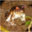

In [ ]:
cdata.data[0]

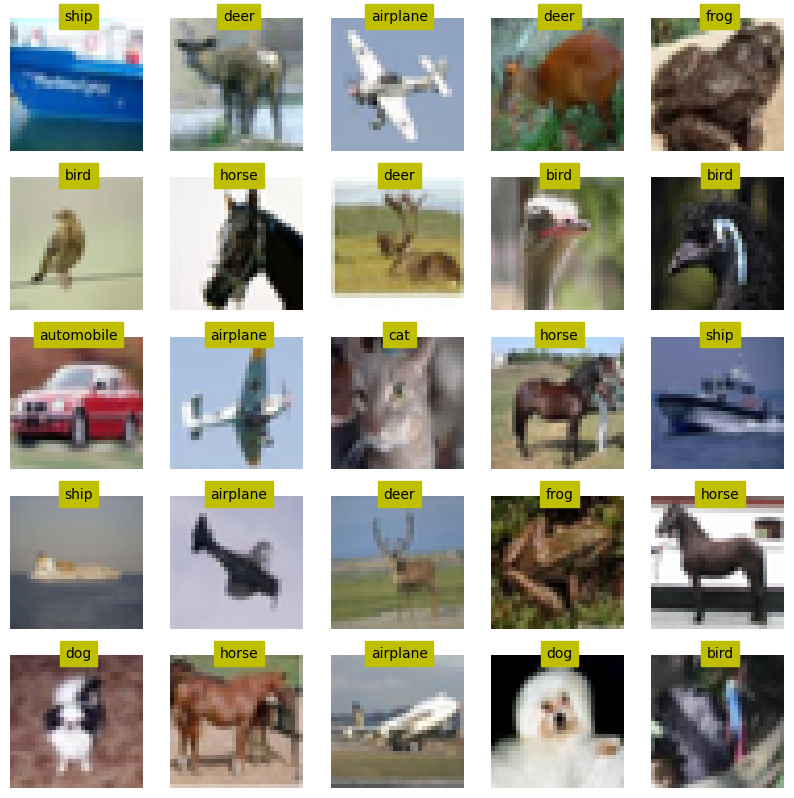

In [ ]:
fig,axs = plt.subplots(5,5,figsize = (10,10))

for ax in axs.flatten():
  randidx = np.random.choice(len(cdata.targets))
  pic = cdata.data[randidx,:,:,:]
  label = cdata.classes[cdata.targets[randidx]]
  ax.imshow(pic)
  ax.text(16,0,label,ha = "center", color = "k",backgroundcolor = "y")
  ax.axis("off")

In [ ]:
cdata100 = torchvision.datasets.CIFAR100(root = 'cifar100',download = True)

100%|██████████| 169M/169M [00:01<00:00, 96.1MB/s]


In [ ]:
print(cdata100.data.shape)
print(cdata100.classes)
print(cdata100.targets)
print(len(cdata100.targets))

(50000, 32, 32, 3)
['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'wha

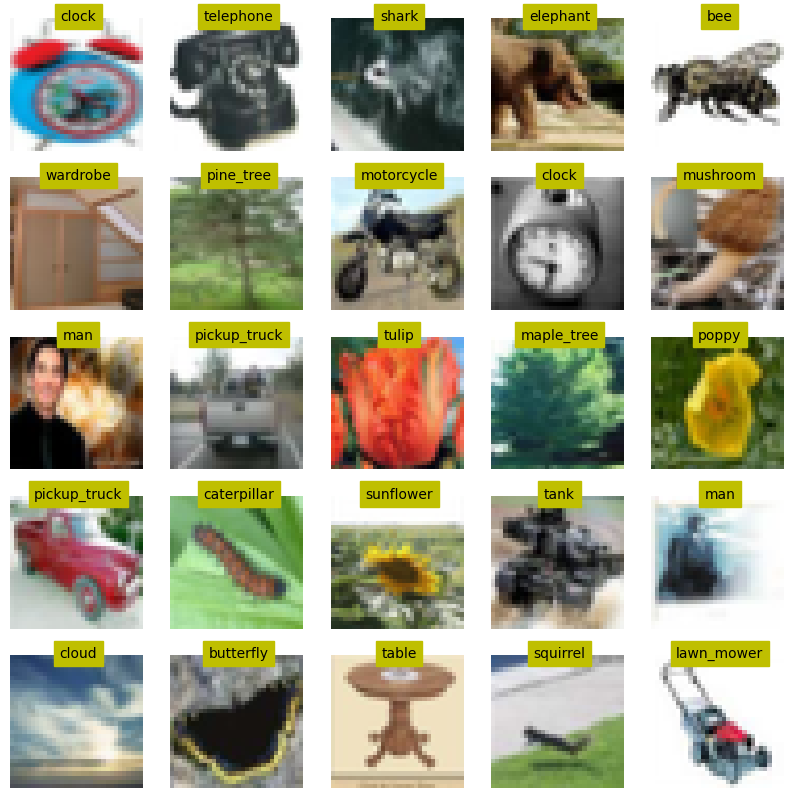

In [ ]:
fig,axs = plt.subplots(5,5,figsize = (10,10))

for ax in axs.flatten():
  randidx = np.random.choice(len(cdata100.targets))
  pic = cdata100.data[randidx,:,:,:]
  label = cdata100.classes[cdata100.targets[randidx]]
  ax.imshow(pic)
  ax.text(16,0,label,ha = "center", color = "k",backgroundcolor = "y")
  ax.axis("off")

#Image Transforms

In [ ]:
Ts = T.Compose([T.ToTensor(), #converts to tensor, normalizes data to lie between 0 to 1
                T.Resize(32*6), #increase resolution by factor of 4
                T.Grayscale(num_output_channels=1)])


cdata.transforms = Ts #include transforms in the dataset

print(cdata.data[0,:,:,:].shape) #tranformation has not been applied yet.

(32, 32, 3)


In [ ]:
cdata = torchvision.datasets.CIFAR10(root = 'cifar10',download = True,transform = Ts)

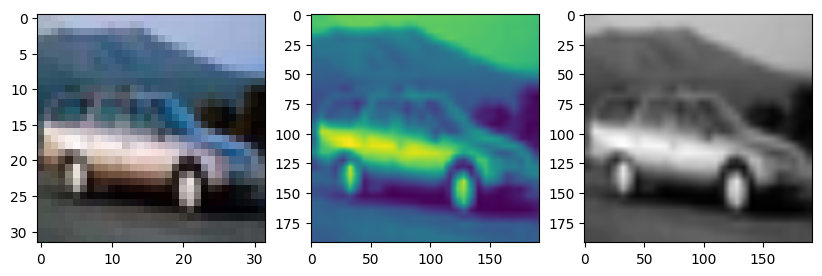

In [ ]:
#apply tranforms externally
n = 4
img1 = Ts(cdata.data[n,:,:,:])

img2 = cdata.transform(cdata.data[n,:,:,:])

fig,ax = plt.subplots(1,3,figsize = (10,3))
ax[0].imshow(cdata.data[n,:,:,:])
ax[1].imshow(torch.squeeze(img1))
ax[2].imshow(torch.squeeze(img2),cmap = "gray")

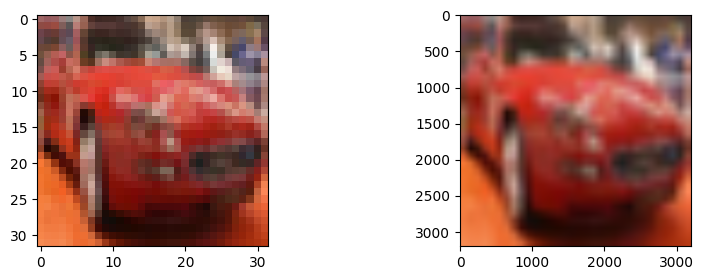

In [ ]:
Ts2 = T.Compose([T.ToTensor(), #converts to tensor, normalizes data to lie between 0 to 1
                T.Resize(32*100) #increase resolution by factor of 4
                ])

n = 5
img1 = Ts2(cdata.data[n,:,:,:])

fig,ax = plt.subplots(1,2,figsize = (10,3))
ax[0].imshow(cdata.data[n,:,:,:])
ax[1].imshow(img1.permute(1,2,0))

In [ ]:
data = np.loadtxt(open('/content/sample_data/mnist_train_small.csv','rb'),delimiter = ',')

#extract 8 records
labels = data[0:8,0]
data = data[0:8,1:]

#normalize
dataNorm = data/np.max(data)

#reshape to 2D
print(dataNorm.shape)
dataNorm = dataNorm.reshape(dataNorm.shape[0],1,28,28)
print(dataNorm.shape)

dataT = torch.tensor(dataNorm).float()
labelsT = torch.tensor(labels).long()

(8, 784)
(8, 1, 28, 28)


In [ ]:
??torch.utils.data.TensorDataset

In [ ]:
class customDataset(Dataset):
  def __init__(self, tensors,transform = None):
          assert all(tensors[0].size(0) == tensor.size(0) for tensor in tensors), (
              "Size mismatch between tensors"
          )
          self.tensors = tensors
          self.transform = transform

  def __getitem__(self, index):

    if self.transform:
      x = self.transform(self.tensors[0][index])
    else:
      x = self.tensors[0][index]

    y = self.tensors[1][index]

    return x,y

  def __len__(self):
    return self.tensors[0].size(0)

In [ ]:
#data -> custom dataset -> dataloader -> pull mini-batches -> apply transformations

imgtrans = T.Compose([
    T.ToPILImage(),
    T.RandomVerticalFlip(p=.5), # 50%probability to flip
    #T.RandomRotation(90),
    T.ToTensor()
])

train_data = customDataset((dataT,labelsT),imgtrans)
print(train_data)

Text(0, 0.5, 'Transformed')

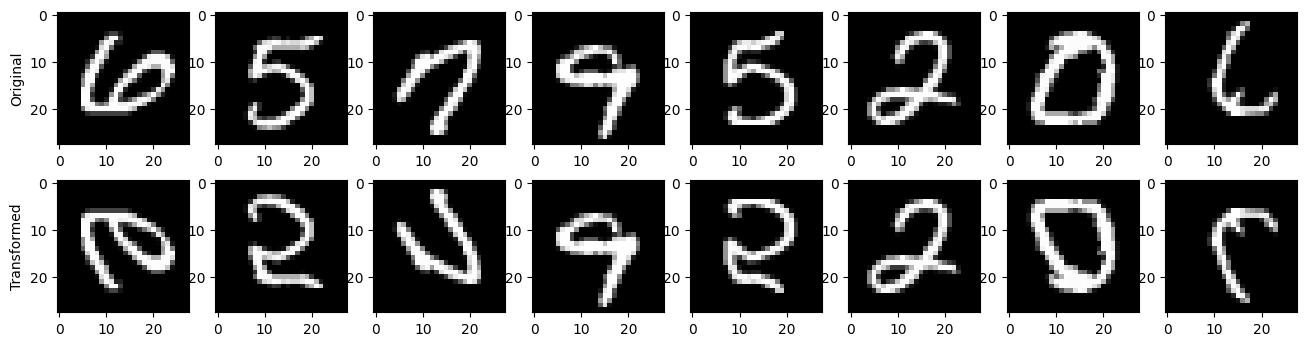

In [ ]:
train_data_loader = DataLoader(train_data,batch_size = 8,shuffle = False)

x,y = next(iter(train_data_loader))

fig,ax = plt.subplots(2,8,figsize = (16,4))

for i in range(8):
  ax[0,i].imshow(dataT[i,0,:,:].detach(),cmap = 'gray')
  ax[1,i].imshow(x[i,0,:,:].detach(),cmap = 'gray')

ax[0,0].set_ylabel("Original")
ax[1,0].set_ylabel("Transformed")

#CNN : classify MNIST

###Architecture

  Image (1x28x28)

  Convolution Layer #1 - 10x26x26

  Pooling Layer #1 - 10x13x13

  Convolution Layer #2 - 20x11x11

  Pooling Layer #2 - Maxpool - 20x5x5

  Fully Connected Layer #1 - 1x50

  Output Layer #1 - 1x10

In [ ]:
#CNN Layers --> Convolution Layer (learn kernels through backprop)
#CNN Layers --> Pooling Layer (reduce dimensionality, increase receptive field size)
#CNN Layers --> Fully Connected Layer (prediction - categorical or continuous)

In [ ]:
data = np.loadtxt(open('/content/sample_data/mnist_train_small.csv','rb'),delimiter = ',')

labels = data[:,0]
data = data[:,1:]

#normalize
dataNorm = data/np.max(data)

#reshape to 2D
print(dataNorm.shape)
dataNorm = dataNorm.reshape(dataNorm.shape[0],1,28,28) #no. of images x channel x width x height
print(dataNorm.shape)

#convert to tensor
dataT = torch.tensor(dataNorm).float()
labelsT = torch.tensor(labels).long()

#split the data into train and test
train_data, test_data, train_labels, test_labels = train_test_split(dataT,labelsT,test_size = 0.1)

#define tranformations
'''imgtrans = T.Compose([
  T.ToPILImage(),
  T.RandomVerticalFlip(p=.5), # 50%probability to flip
  #T.RandomRotation(90),
  T.ToTensor()
])'''

#create tensor or custom datasets
'''train_data = customDataset((dataT,labelsT),imgtrans)
print(train_data)'''

train_dataset = TensorDataset(train_data,train_labels)
test_dataset = TensorDataset(test_data,test_labels)

#DataLoader
batchsize = 32
train_loader = DataLoader(train_dataset,batch_size = batchsize , shuffle = True, drop_last = True)
test_loader = DataLoader(test_dataset,batch_size = test_dataset.tensors[0].shape[0])
print("train dataloader dimensions :",train_loader.dataset.tensors[0].shape) # no. of images x channel x width x height

(20000, 784)
(20000, 1, 28, 28)
train dataloader dimensions : torch.Size([18000, 1, 28, 28])


In [ ]:
def cnn_initialization_1(printtoggle = False):

  class cnn_arch_1(nn.Module):
    def __init__(self,printtoggle):
      super().__init__()

      #input 20000x1x28x28

      #convolution layer#1 10x26x26
      self.conv1 = nn.Conv2d(1,10,kernel_size = 5,stride = 1,padding = 1)#inChans,outChans,krnSize,stride,padding
      #size of output : np.floor((28+2*1-5)/1)+1 = 26
      #maxpooling layer output : 26/2 = 13
      #10x13x13

      #convolution layer#2 10x26x26
      self.conv2 = nn.Conv2d(10,20,kernel_size = 5,stride = 1,padding = 1)
      #size of output : np.floor((13 + 2*1 - 5)/1) + 1 = 11
      #maxpooling layer output : 11/2 ~ 5
      #20x5x5

      expectedSize = 20*5*5
      print("input to fc1 :",expectedSize)

      #fully connected layer
      self.fc1 = nn.Linear(expectedSize,50)

      #output  layer
      self.out = nn.Linear(50,10)

      #toggle for printing out tensor sizes during forward prop
      self.print = printtoggle

    def forward(self,x):
      def print_fun(msg,x):
        if self.print:
          print(msg,x.shape)

      print_fun("input layer: ",x)

      #convolution -> maxpooling -> relu
      x = F.relu(F.max_pool2d(self.conv1(x),kernel_size = 2))
      print_fun("cov/pool layer1: ",x)

      x = F.relu(F.max_pool2d(self.conv2(x),kernel_size = 2))
      print_fun("cov/pool layer2: ",x)

      #reshape / vectorize for linear layer
      nUnits = x.shape.numel()/x.shape[0]
      y = x

      x = x.view(-1,int(nUnits))
      print_fun("vectorize: ",x)

      #y = y.flatten() #this will not work
      #print_fun("flatten",y)

      x = F.relu(self.fc1(x))
      print_fun("fc1: ",x)

      x = self.out(x)
      print_fun("output: ",x)

      return x

  model = cnn_arch_1(printtoggle)
  lossfun = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

  return model,lossfun,optimizer

In [ ]:
model,lossfun,optimizer = cnn_initialization_1(True)
x,y = next(iter(train_loader))
yhat = model(x)
print()
print("yhat shape",yhat.shape)
loss = lossfun(yhat,y)
print("Loss",loss)

input to fc1 : 500
input layer:  torch.Size([32, 1, 28, 28])
cov/pool layer1:  torch.Size([32, 10, 13, 13])
cov/pool layer2:  torch.Size([32, 20, 5, 5])
vectorize:  torch.Size([32, 500])
fc1:  torch.Size([32, 50])
output:  torch.Size([32, 10])

yhat shape torch.Size([32, 10])
Loss tensor(2.3403, grad_fn=<NllLossBackward0>)


In [ ]:
summary(model,(1,28,28))

input layer:  torch.Size([2, 1, 28, 28])
cov/pool layer1:  torch.Size([2, 10, 13, 13])
cov/pool layer2:  torch.Size([2, 20, 5, 5])
vectorize:  torch.Size([2, 500])
fc1:  torch.Size([2, 50])
output:  torch.Size([2, 10])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]             260
            Conv2d-2           [-1, 20, 11, 11]           5,020
            Linear-3                   [-1, 50]          25,050
            Linear-4                   [-1, 10]             510
Total params: 30,840
Trainable params: 30,840
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.07
Params size (MB): 0.12
Estimated Total Size (MB): 0.19
----------------------------------------------------------------


In [ ]:
#training
def training(model,lossfun,optimizer,numepochs,train_loader,test_loader):

  #initialize losses
  losses    = torch.zeros(numepochs)
  trainAcc  = []
  testAcc   = []

  #loop over epochs
  for epochi in range(numepochs):

    #loop over training data batches

    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = model(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      #loss from this batch
      batchLoss.append(loss.item())

      #compute accuracy
      matches = torch.argmax(yHat,axis=1) == y
      matchesNumeric = matches.float()
      accuracyPct = 100*torch.mean(matchesNumeric)
      batchAcc.append( accuracyPct )


    #average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    #average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    #test accuracy
    model.eval()
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    with torch.no_grad(): # deactivates autograd
      yHat = model(X)

    testAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1)==y).float()) )
    model.train()


  return trainAcc,testAcc,losses,model


In [ ]:
numepochs = 10
model,lossfun,optimizer = cnn_initialization_1(False)
trainAcc,testAcc,losses,model = training(model,lossfun,optimizer,numepochs,train_loader,test_loader)

input to fc1 : 500


test accuracy  97.69999694824219
train accuracy  99.1


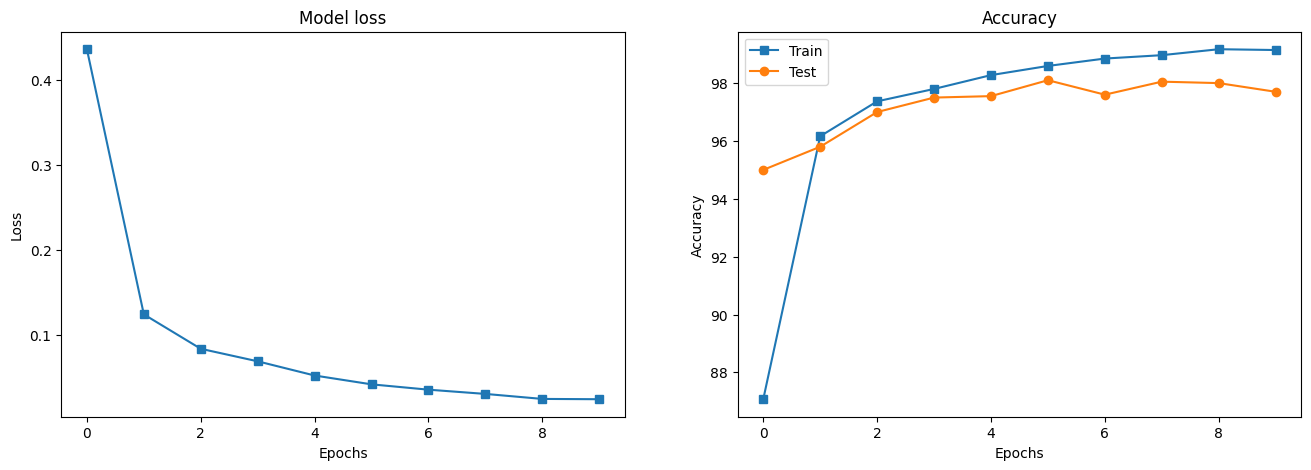

In [ ]:
fig,ax = plt.subplots(1,2,figsize = (16,5))

ax[0].plot(losses,'s-')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].set_title("Model loss")

ax[1].plot(trainAcc,'s-',label = "Train")
ax[1].plot(testAcc,'o-',label = "Test")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].set_title("Accuracy")
ax[1].legend()

print("test accuracy ",testAcc[-1].item())
print("train accuracy ",round(trainAcc[-1],1))

#Rolled MNIST

In [ ]:
data = np.loadtxt(open('/content/sample_data/mnist_train_small.csv','rb'),delimiter = ',')

labels = data[:,0]
data = data[:,1:]

#normalize
dataNorm = data/np.max(data)

#reshape to 2D
print(dataNorm.shape)
dataNorm = dataNorm.reshape(dataNorm.shape[0],1,28,28) #no. of images x channel x width x height
print(dataNorm.shape)

#convert to tensor
dataT = torch.tensor(dataNorm).float()
labelsT = torch.tensor(labels).long()

#split the data into train and test
train_data, test_data, train_labels, test_labels = train_test_split(dataT,labelsT,test_size = 0.1)

#define tranformations
'''imgtrans = T.Compose([
  T.ToPILImage(),
  T.RandomVerticalFlip(p=.5), # 50%probability to flip
  #T.RandomRotation(90),
  T.ToTensor()
])'''

#create tensor or custom datasets
'''train_data = customDataset((dataT,labelsT),imgtrans)
print(train_data)'''

train_dataset = TensorDataset(train_data,train_labels)
test_dataset = TensorDataset(test_data,test_labels)

#DataLoader
batchsize = 32
train_loader = DataLoader(train_dataset,batch_size = batchsize , shuffle = True, drop_last = True)
test_loader = DataLoader(test_dataset,batch_size = test_dataset.tensors[0].shape[0])
print("train dataloader dimensions :",train_loader.dataset.tensors[0].shape) # no. of images x channel x width x height

In [ ]:
#randomly rolling images by 10 pixels

#training data
for i in range(train_loader.dataset.tensors[0].shape[0]):
  img = train_loader.dataset.tensors[0][i,:,:]

  randroll = np.random.randint(-10,11)
  img = torch.roll(img,randroll,dims = 1)

  train_loader.dataset.tensors[0][i,:,:] = img

#test data
for i in range(test_loader.dataset.tensors[0].shape[0]):
  img = test_loader.dataset.tensors[0][i,:,:]

  randroll = np.random.randint(-10,11)
  img = torch.roll(img,randroll,dims = 1)

  test_loader.dataset.tensors[0][i,:,:] = img

In [ ]:
#using existing model (trained on non-shifted data)
x,y = next(iter(test_loader))
yhat = model(x)
print("Test accuracy using pretrained model and shifted test data",100*torch.mean((torch.argmax(yhat,axis=1)==y).float()))
#conclusion : test accuracy is better than when we did this with FNNs indicating the CNNs are more robut to spatial translations.
#However its still quite low and architecture needs revision for improving performance

Test accuracy using pretrained model and shifted test data tensor(44.4000)


input to fc1 : 500
test accuracy  94.0
train accuracy  97.0


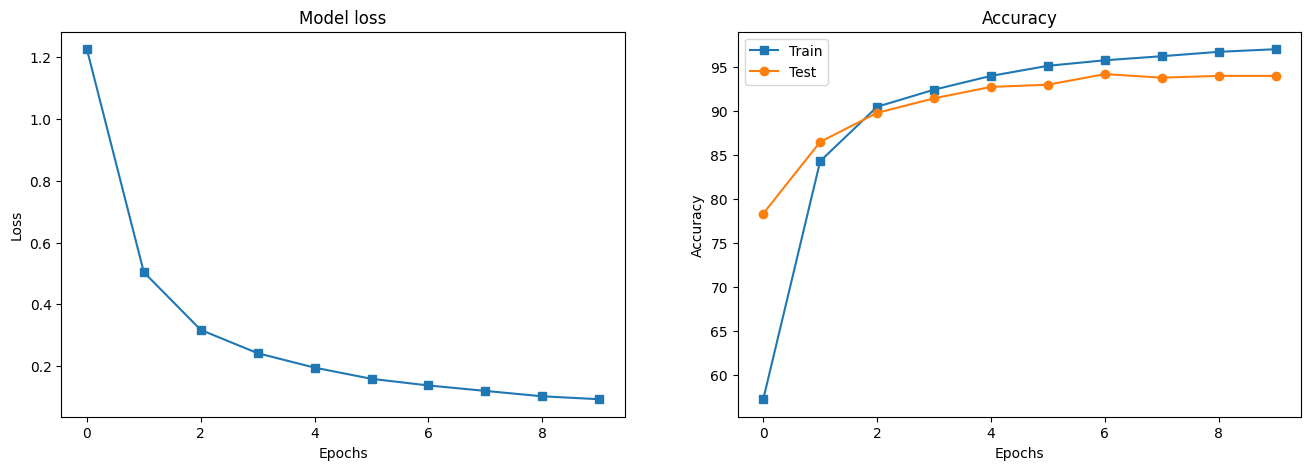

In [ ]:
#training model on shifted (rolled) data
numepochs = 10
model,lossfun,optimizer = cnn_initialization_1(False)
trainAcc,testAcc,losses,model = training(model,lossfun,optimizer,numepochs,train_loader,test_loader)
fig,ax = plt.subplots(1,2,figsize = (16,5))

ax[0].plot(losses,'s-')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].set_title("Model loss")

ax[1].plot(trainAcc,'s-',label = "Train")
ax[1].plot(testAcc,'o-',label = "Test")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].set_title("Accuracy")
ax[1].legend()

print("test accuracy ",testAcc[-1].item())
print("train accuracy ",round(trainAcc[-1],1))

#Modelling Gaussians

$$ f(x, y) = A \exp \left( -\frac{ (x-x_0)^2 }{2\sigma_x^2} - \frac{ (y-y_0)^2 }{2\sigma_y^2} \right) $$

$$\small\text{Architecture}$$ \\ \\ $\small\text{Image (1x91x91)}$ \\ $\small\rightarrow \text{Convolution Layer #1 - 6x91x91}$ \\ $\small\rightarrow \text{Pooling Layer #1 - 6x45x45}$ \\ $\small\rightarrow \text{Convolution Layer #2 - 4x45x45}$ \\ $\small\rightarrow \text{Pooling Layer #2 - Maxpool - 4x22x22}$ \\ $\small\rightarrow \text{Fully Connected Layer #1 - 1x50}$ \\ $\small\rightarrow \text{Output Layer - 1x1}$

In [ ]:
#create data
nPerClass = 1000
imgSize = 91

x = np.linspace(-4,4,imgSize)
x,y = np.meshgrid(x,x)

widths = [1.8,2.4] #sigma

images = torch.zeros(2*nPerClass,1,imgSize,imgSize)
labels = torch.zeros(2*nPerClass)

for i in range(2*nPerClass):
  ro = 2*np.random.randn(2) #random offset
  G = np.exp((-(x-ro[0])**2 - (y-ro[1])**2)/(2*widths[i%2]**2))

  #adding noise
  G = G + np.random.randn(imgSize,imgSize)/5

  #add to tensor
  images[i,:,:,:] = torch.tensor(G).view(1,imgSize,imgSize)
  labels[i] = i%2

labels = labels[:,None]

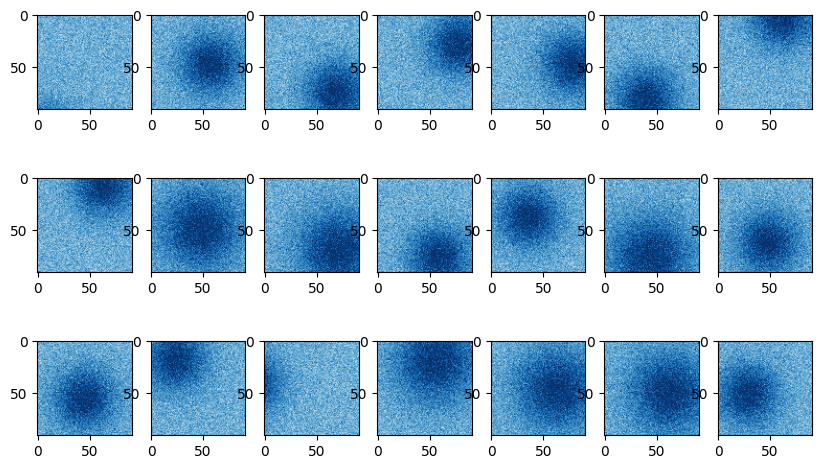

In [ ]:
fig,axs = plt.subplots(3,7,figsize = (10,6))

for i,ax in enumerate(axs.flatten()):
  whichpic = np.random.randint(2*nPerClass)
  G= np.squeeze(images[whichpic,:,:])
  ax.imshow(G,vmin = -1,vmax = 1,cmap ='Blues')

In [ ]:
#split the data into train and test
train_data, test_data, train_labels, test_labels = train_test_split(images,labels,test_size = 0.1)

#define tranformations
'''imgtrans = T.Compose([
  T.ToPILImage(),
  T.RandomVerticalFlip(p=.5), # 50%probability to flip
  #T.RandomRotation(90),
  T.ToTensor()
])'''

#create tensor or custom datasets
'''train_data = customDataset((dataT,labelsT),imgtrans)
print(train_data)'''

train_dataset = TensorDataset(train_data,train_labels)
test_dataset = TensorDataset(test_data,test_labels)

#DataLoader
batchsize = 32
train_loader = DataLoader(train_dataset,batch_size = batchsize , shuffle = True, drop_last = True)
test_loader = DataLoader(test_dataset,batch_size = test_dataset.tensors[0].shape[0])
print("train dataloader dimensions :",train_loader.dataset.tensors[0].shape) # no. of images x channel x width x height
print("test dataloader dimensions :",test_loader.dataset.tensors[0].shape) # no. of images x channel x width x height
print("train dataloader dimensions :",test_loader.dataset.tensors[1].shape) # no. of images x channel x width x height

train dataloader dimensions : torch.Size([1800, 1, 91, 91])
test dataloader dimensions : torch.Size([200, 1, 91, 91])
train dataloader dimensions : torch.Size([200, 1])


In [ ]:
def cnn_initialization_2():

  class cnn_arch_2(nn.Module):
    def __init__(self):
      super().__init__()

      self.enc = nn.Sequential(
          nn.Conv2d(1,6,3,padding = 1), #output size = (91 +2*1-3)/1 + 1 = 91
          nn.ReLU(),
          nn.AvgPool2d(2,2), #default value of stride is kernel size #output size = 91/2 ~ 45

          nn.Conv2d(6,4,3,padding = 1), #output size = (45 +2*1-3)/1 + 1 = 45
          nn.ReLU(),
          nn.AvgPool2d(2,2), #output size = 45/2 ~ 22

          nn.Flatten(), #vectorize conv output
          nn.Linear(22*22*4,50),
          nn.ReLU(),
          nn.Linear(50,1)

      )

    def forward(self,x):
      return self.enc(x)


  model = cnn_arch_2()
  lossfun = nn.BCEWithLogitsLoss()
  optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

  return model,lossfun,optimizer

In [ ]:
#test
model,lossfun,optimizer = cnn_initialization_2()

x,y = next(iter(train_loader))
yhat = model(x)
loss = lossfun(yhat,y)
print(yhat.shape)
print(loss)

torch.Size([32, 1])
tensor(0.6873, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


In [ ]:
summary(model,(1,91,91))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 91, 91]              60
              ReLU-2            [-1, 6, 91, 91]               0
         AvgPool2d-3            [-1, 6, 45, 45]               0
            Conv2d-4            [-1, 4, 45, 45]             220
              ReLU-5            [-1, 4, 45, 45]               0
         AvgPool2d-6            [-1, 4, 22, 22]               0
           Flatten-7                 [-1, 1936]               0
            Linear-8                   [-1, 50]          96,850
              ReLU-9                   [-1, 50]               0
           Linear-10                    [-1, 1]              51
Total params: 97,181
Trainable params: 97,181
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.03
Forward/backward pass size (MB): 1.00
Params size (MB): 0.37
Estimated Tot

In [ ]:
#training
def training2(model,lossfun,optimizer,numepochs,train_loader,test_loader):

  #initialize losses
  losses    = torch.zeros(numepochs)
  trainAcc  = []
  testAcc   = []

  #loop over epochs
  for epochi in range(numepochs):

    #loop over training data batches

    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = model(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      #loss from this batch
      batchLoss.append(loss.item())

      #compute accuracy
      matches = ((yHat>0).float() == y)
      matchesNumeric = matches.float()
      accuracyPct = 100*torch.mean(matchesNumeric)
      batchAcc.append( accuracyPct )


    #average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    #average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    #test accuracy
    model.eval()
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    with torch.no_grad(): # deactivates autograd
      yHat = model(X)

    testAcc.append( 100*torch.mean((((yHat>0).float())==y).float()) )
    model.train()


  return trainAcc,testAcc,losses,model


test accuracy  97.0
train accuracy  97.9


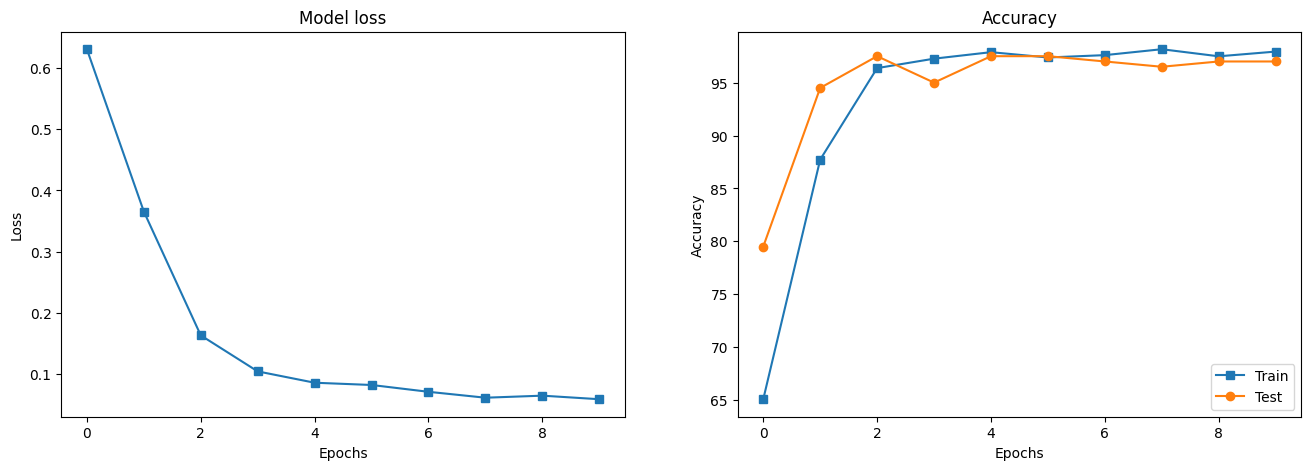

In [ ]:
#model initialization
model,lossfun,optimizer = cnn_initialization_2()

#model training
numepochs = 10
trainAcc,testAcc,losses,model = training2(model,lossfun,optimizer,numepochs,train_loader,test_loader)

#visualizing results
fig,ax = plt.subplots(1,2,figsize = (16,5))

ax[0].plot(losses,'s-')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].set_title("Model loss")

ax[1].plot(trainAcc,'s-',label = "Train")
ax[1].plot(testAcc,'o-',label = "Test")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].set_title("Accuracy")
ax[1].legend()

print("test accuracy ",testAcc[-1].item())
print("train accuracy ",round(trainAcc[-1],1))

In [ ]:
model.enc

Sequential(
  (0): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (3): Conv2d(6, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=1936, out_features=50, bias=True)
  (8): ReLU()
  (9): Linear(in_features=50, out_features=1, bias=True)
)

In [ ]:
print(model.enc[0])
print(model.enc[0].weight.shape)

Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
torch.Size([6, 1, 3, 3])


Text(0.5, 0.98, 'Convolution Kernels #1')

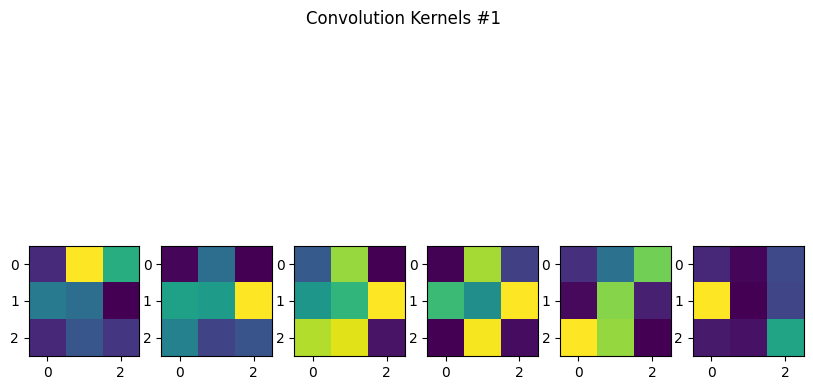

In [ ]:
fig,ax = plt.subplots(1,6,figsize = (10,6))

for i in range(6):
  kernel = model.enc[0].weight[i,:,:,:]
  #print(kernel)
  ax[i].imshow(torch.squeeze(kernel.detach()))

plt.suptitle("Convolution Kernels #1")

In [ ]:
print(model.enc[3])
print(model.enc[3].weight.shape)

Conv2d(6, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
torch.Size([4, 6, 3, 3])


Text(0.5, 0.98, 'Convolution Kernels #2')

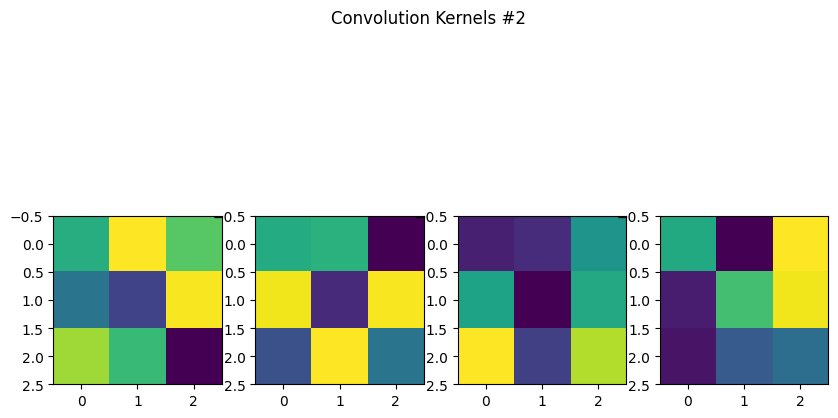

In [ ]:
fig,ax = plt.subplots(1,4,figsize = (10,6))

for i in range(4):
  kernel = model.enc[3].weight[i,0,:,:]
  #print(kernel)
  ax[i].imshow(torch.squeeze(kernel.detach()))

plt.suptitle("Convolution Kernels #2")

#Feature maps

In [ ]:
def cnn_initialization_3(printtoggle = False):

  class cnn_arch_3(nn.Module):
    def __init__(self,printtoggle):
      super().__init__()


      self.conv1 = nn.Conv2d(1,6,kernel_size = 3,stride = 1,padding = 1)#inChans,outChans,krnSize,stride,padding

      self.conv2 = nn.Conv2d(6,4,kernel_size = 3,stride = 1,padding = 1)

      expectedSize = 22*22*4

      #fully connected layer
      self.fc1 = nn.Linear(expectedSize,50)

      #output  layer
      self.out = nn.Linear(50,1)

      #toggle for printing out tensor sizes during forward prop
      self.print = printtoggle

    def forward(self,x):
      def print_fun(msg,x):
        if self.print:
          print(msg,x.shape)

      print_fun("input layer: ",x)

      conv1x = F.relu(self.conv1(x))
      x = F.avg_pool2d(conv1x,(2,2))
      print_fun("cov/pool layer1: ",x)

      conv2x = F.relu(self.conv2(x))
      x = F.avg_pool2d(conv2x,(2,2))
      print_fun("cov/pool layer2: ",x)

      #reshape / vectorize for linear layer
      x = x.reshape(x.shape[0],-1)
      print_fun("vectorize: ",x)

      x = F.relu(self.fc1(x))
      print_fun("fc1: ",x)

      x = self.out(x)
      print_fun("output: ",x)

      return x,conv1x,conv2x

  model = cnn_arch_3(printtoggle)
  lossfun = nn.BCEWithLogitsLoss()
  optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

  return model,lossfun,optimizer

In [ ]:
#training
def training3(model,lossfun,optimizer,numepochs,train_loader,test_loader):

  #initialize losses
  losses    = torch.zeros(numepochs)
  trainAcc  = []
  testAcc   = []

  #loop over epochs
  for epochi in range(numepochs):

    #loop over training data batches

    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = model(X)[0]
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      #loss from this batch
      batchLoss.append(loss.item())

      #compute accuracy
      matches = ((yHat>0).float() == y)
      matchesNumeric = matches.float()
      accuracyPct = 100*torch.mean(matchesNumeric)
      batchAcc.append( accuracyPct )


    #average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    #average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    #test accuracy
    model.eval()
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    with torch.no_grad(): # deactivates autograd
      yHat = model(X)[0]

    testAcc.append( 100*torch.mean((((yHat>0).float())==y).float()) )
    model.train()


  return trainAcc,testAcc,losses,model


test accuracy  98.0
train accuracy  98.1


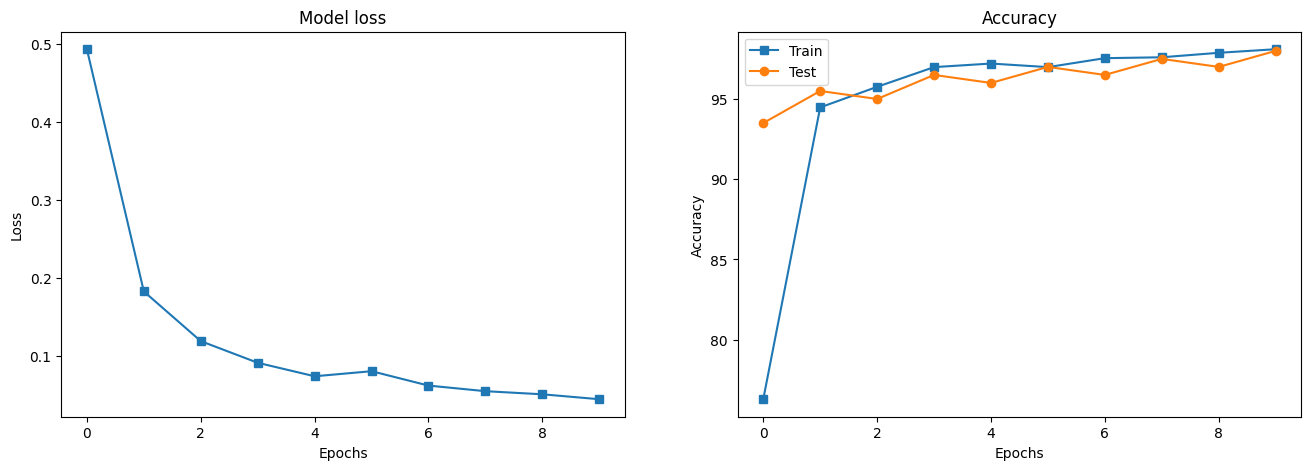

In [ ]:
#model initialization
model,lossfun,optimizer = cnn_initialization_3(False)

#model training
numepochs = 10
trainAcc,testAcc,losses,model = training3(model,lossfun,optimizer,numepochs,train_loader,test_loader)

#visualizing results
fig,ax = plt.subplots(1,2,figsize = (16,5))

ax[0].plot(losses,'s-')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].set_title("Model loss")

ax[1].plot(trainAcc,'s-',label = "Train")
ax[1].plot(testAcc,'o-',label = "Test")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].set_title("Accuracy")
ax[1].legend()

print("test accuracy ",testAcc[-1].item())
print("train accuracy ",round(trainAcc[-1],1))

In [ ]:
X,y = next(iter(test_loader))
yhat,conv1x,conv2x = model(X)


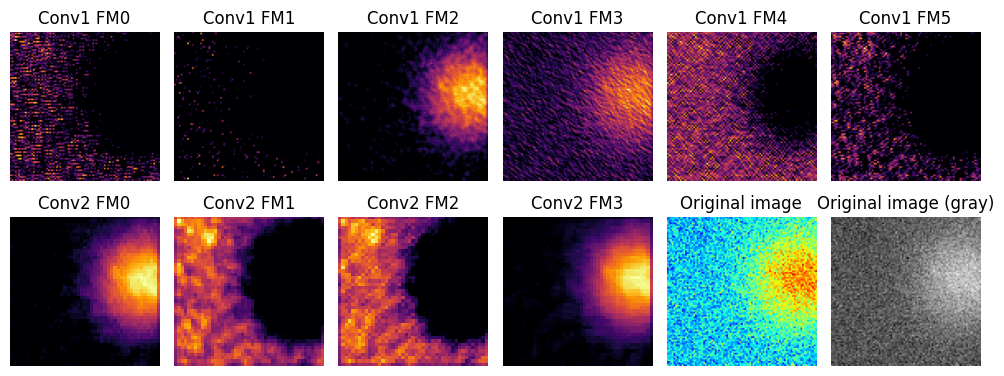

In [ ]:
fig,axs = plt.subplots(2,6,figsize=(10,4))

for i in range(6):
    axs[0,i].imshow(conv1x[0,i,:,:].detach(), cmap='inferno')
    axs[0,i].set_title(f'Conv1 FM{i}')
    axs[0,i].axis('off')

for i in range(4):
    axs[1,i].imshow(conv2x[0,i,:,:].detach(), cmap='inferno')
    axs[1,i].set_title(f'Conv2 FM{i}')
    axs[1,i].axis('off')


axs[1,4].imshow(torch.squeeze(X[0,:,:].detach()), cmap='jet')
axs[1,4].set_title('Original image')
axs[1,4].axis('off')

axs[1,5].imshow(torch.squeeze(X[0,:,:].detach()), cmap='gray')
axs[1,5].set_title('Original image (gray)')
axs[1,5].axis('off')

plt.tight_layout()
plt.show()